In [36]:
from model.model import *
from processing_pipeline import *

In [9]:
%load_ext autoreload
%autoreload 2

In [2]:
download()
alldat = load()
print("Data Loaded. Proceeding to Preprocessing...")
session = 12

Loading data. Patience, padawan ...
Data Loaded. Proceeding to Preprocessing...


In [37]:
dfs = pd.concat([preprocess(alldat, i) for i in range(39)])

In [38]:
train, test = train_test_split(dfs)

In [7]:
train.shape

(7814, 21)

In [6]:
set(test["session"])

{1, 4, 8, 12, 19, 22, 25, 30, 35}

In [39]:
df = train

In [63]:
import seaborn as sns

def plots_2(df, var = "resp_time", features = ["pres_acc", "resp_time"], pres_diff = 0.5):
    df = df[df["trial_type"]!= "E"]
#     df = df[df["mouse_resp"]!= 0]
    df = df[df["pres_difficulty"] == pres_diff]
    for feature in features:
        if df[feature].dtype in [float, int]:
            if len(list(set(df[feature].dropna()))) < 10:
                plt.figure()
                sns.violinplot(df[feature], df[var])  
                plt.xlabel(feature)
                plt.ylabel(var)
                plt.title("Difficulty: %s Response Time"%(pres_diff))
                          

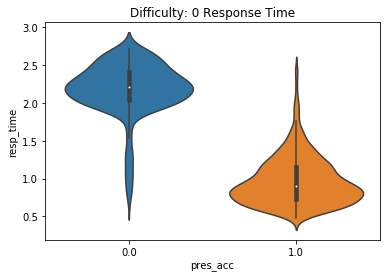

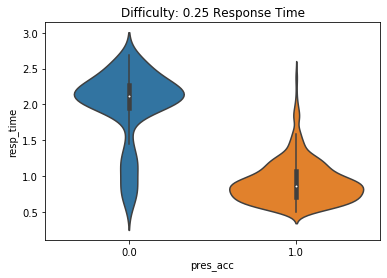

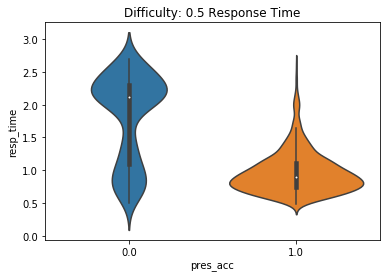

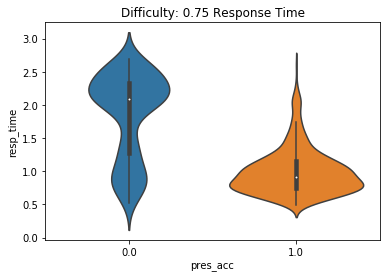

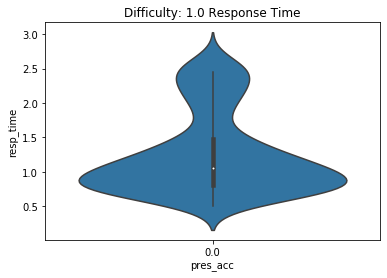

In [65]:
for i in [0, 0.25, 0.5, 0.75, 1.0]:
    plots_2(df, var = "resp_time", features = ["pres_acc", "resp_time"], pres_diff=i)

In [59]:
set(df["mouse_resp"])

{-1.0, 0.0, 1.0}